In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

In [89]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


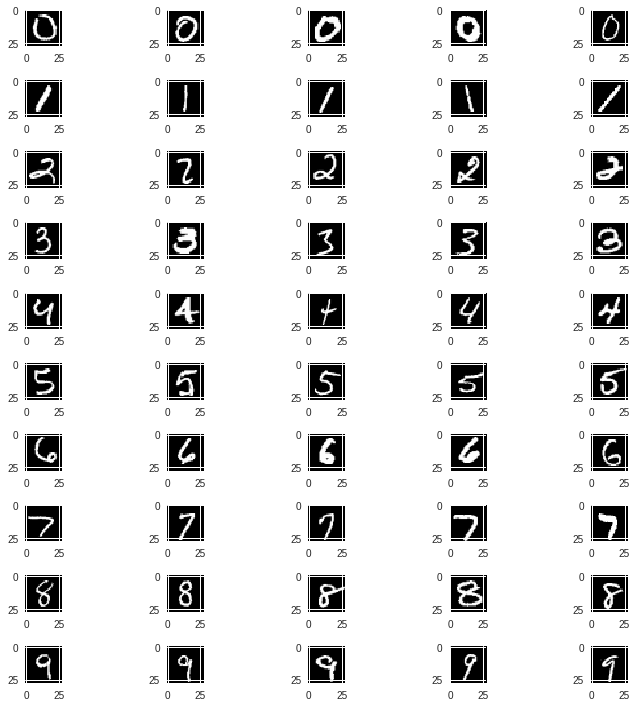

In [90]:
no_of_samples=[]
cols=5
num_classes=10
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(10,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[Y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))

In [91]:
len(Y_train==j)

60000

In [0]:
y_train=to_categorical(Y_train,10)
  #here we convert y into binary
   #    Y_train is data to be converted into binary 
    #   and 10 is no of calsses we have to convert into  
y_test=to_categorical(Y_test,10)
X_train=X_train/255
X_test=X_test/255

In [94]:
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
print(X_train.shape)


(60000, 784)


In [95]:
y_train.shape

(60000, 10)

In [0]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=num_pixels,activation="relu"))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.01),loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [97]:
model=create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.5464 - acc: 0.8278 - val_loss: 0.2753 - val_acc: 0.9217
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3028 - acc: 0.9112 - val_loss: 0.2391 - val_acc: 0.9310
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2772 - acc: 0.9195 - val_loss: 0.2323 - val_acc: 0.9338
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2616 - acc: 0.9228 - val_loss: 0.2147 - val_acc: 0.9382
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2486 - acc: 0.9270 - val_loss: 0.2194 - val_acc: 0.9355
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2463 - acc: 0.9285 - val_loss: 0.2133 - val_acc: 0.9387
Epoch 7/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2404 - acc: 0.9298 - val_loss: 0.2024 - val_acc:

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:449: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http:/

Text(0.5, 0, 'epoch')

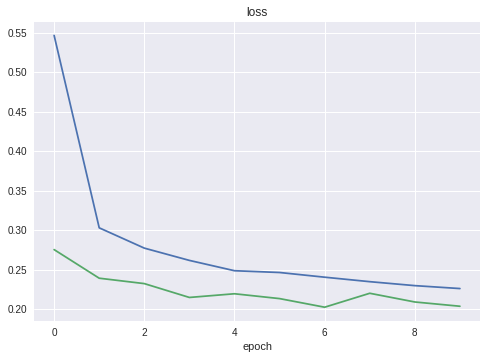

In [100]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend("loss",'val_loss')
plt.title("loss")
plt.xlabel("epoch")

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


Text(0.5, 0, 'epoch')

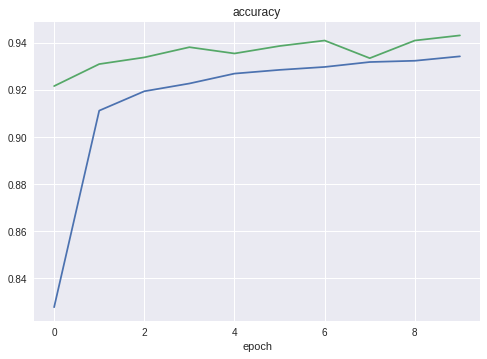

In [101]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend("acc",'val_acc')
plt.title("accuracy")
plt.xlabel("epoch")

In [111]:
X_test=X_test.reshape(X_test.shape[0],784)
score=model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print("Test Score",score[0])
print("Test accuracy",score[1])

<class 'list'>
Test Score 0.24212813897877933
Test accuracy 0.9318


In [109]:
X_train.shape

(60000, 784)

In [123]:
img=X_train[0]
img=img.reshape(1,784)
prediction=model.predict_classes(img)
print(str(prediction))

[3]


(784,)